# Wine Recommendations

In [2]:
import pandas as pd
import numpy as np
import string
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import NearestNeighbors
%matplotlib inline

In [3]:
def toWordList(text):
    text_array = []
    word_list= []
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(text)):
        text_array.append(np.array(tokenizer.tokenize(text[idx].lower())))
    for words in text_array:
        for word in words:
            word_list.append(word)
    return np.array(word_list)

In [4]:
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in vectorizer.get_stop_words()]

In [26]:
def get_recommended_wines(search_term, model, vectorizer):
    distances, indices = nbrs.kneighbors(vectorizer.transform([search_term]), 5)
    distances = distances.flatten()
    indices = indices.flatten()
    descriptions = reviewsDf.iloc[indices]['description']
    titles = reviewsDf.iloc[indices]['title']
    return distances, np.array(descriptions), np.array(titles)

In [22]:
def showResults(closest):
    for i in range(len(closest[0])):
        print(f'Score: {closest[0][i]}')
        print(f'Title: {closest[2][i]}')
        print(f'Description: {closest[1][i]}')
        print('\n')

# Data Prep

In [6]:
reviewsDf = pd.read_csv('./data/winemag-data-130k-v2.csv') 

In [7]:
reviewsDf = reviewsDf[['description','title']]

In [8]:
descriptions = reviewsDf.description.tolist()

In [9]:
all_words = toWordList(descriptions)

In [10]:
wordFreq = FreqDist(all_words)

### We want to remove the 20 most common words since they are not useful. 

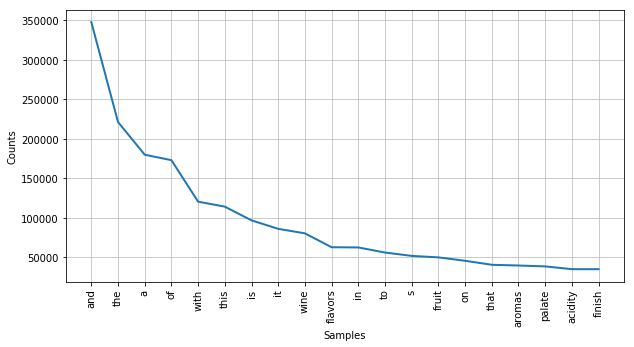

In [11]:
plt.figure(figsize=(10, 5))
wordFreq.plot(20,cumulative=False) # Top 50 used words
plt.show()

In [12]:
stop_words = [word[0] for word in wordFreq.most_common(20)]

# Create NB Model

In [15]:
vectorizer = CountVectorizer(stop_words = stop_words, analyzer=text_process)
tfidf_matrix = vectorizer.fit_transform(descriptions)

In [24]:
nbrs = NearestNeighbors(n_neighbors=5, metric='cosine').fit(tfidf_matrix)

### Let's query for "white and sweet wine with a vanilla flavor"

In [27]:
closest = get_recommended_wines('white and sweet wine with a vanilla flavor', nbrs, vectorizer)

In [28]:
showResults(closest)

Score: 0.5256583509747431
Title: The White Knight 2011 Riesling (Lake County)
Description: This is a sweet wine with flavors of white sugar, orange, honey and vanilla, all brightened by crisp acidity.


Score: 0.5256583509747431
Title: Rexford 2010 Regan Vineyard Pinot Gris (Santa Cruz Mountains)
Description: This seems heavy and sweet for a Pinot Gris, with flavors of white sugar, orange and vanilla.


Score: 0.5256583509747431
Title: The White Knight 2011 Riesling (Lake County)
Description: This is a sweet wine with flavors of white sugar, orange, honey and vanilla, all brightened by crisp acidity.


Score: 0.5285954792089682
Title: Lander-Jenkins 2010 Spirit Hawk Chardonnay (California)
Description: Very sweet in white sugared orange and vanilla flavors, like a honey-nut candy bar. Will satisfy Chard lovers with a sweet tooth


Score: 0.5669872981077806
Title: Bougetz 2013 Sauvignon Blanc (Napa Valley)
Description: Barrel-fermented and blended with a splash of Sémillon, this is a cr

### Not let's query for "white and sweet wine with a vanilla flavor"

In [31]:
closest = get_recommended_wines('red and dry with cherry flavor', nbrs, vectorizer)

In [32]:
showResults(closest)

Score: 0.4429139854688444
Title: Gantenbein 2011 Pinot Noir (Switzerland)
Description: This wine is cherry red with soft brown tinges, offering a nose of cherry with notes of summer farmstand. The predominant flavor is of tart cherry, interlaced with hints of red raspberry and bell pepper.


Score: 0.4787139648573131
Title: Cramele Recas 2014 Dreambird Merlot (Viile Timisului)
Description: This easy-drinking red wine has aromas of cherry, black plum and eucalyptus. Flavors of red cherry, cherry turnover and vanilla remain on the palate through the soft finish.


Score: 0.4787139648573131
Title: Camille Giroud 2008 Charmes Chambertin  (Charmes-Chambertin)
Description: A solid structure and layers of dense fruit characterize this wine. Rich acidity, red cherry flavor and a dry, dark tannic core are surrounded by juicy red berry fruits and the freshest finish.


Score: 0.4836022205056778
Title: Merriam 2008 SNED Red (Sonoma County)
Description: A rustic red blend, with tobacco, herb, cher